<a href="https://colab.research.google.com/github/Grcf2585/RESSBIO/blob/S2-based-water-parameters-retrieval/S2_water_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Install the required libraries**

In [ ]:
!pip install geemap
!pip install earthengine-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 66.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 48.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.5/130.5 kB 15.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 70.6 MB/s eta 0:00:00
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11135 sha256=5bd66afd2e6af48981a25aa02c672b0192eea9da8ca9b936c97ae2

In [ ]:
!pip install PyShp
!pip install PyCRS
!pip install geopandas
#geemap.update_package()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.7 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for PyCRS: filename=PyCRS-1.0.2-py3-none-any.whl size=32702 sha256=b8be8203a3c3669ec1375a32b430950a8427d7634876f7667334d6525514c9cf
  Stored in directory: /root/.cache/pip/wheels/47/1d/70/7a5bdf33347e7c75e95b06b1fa38f076a59a9506653cc24aff
Successfully built PyCRS
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 31.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 56.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 55.2 MB/s eta 0:00:00


**Import libraries**

In [ ]:
import ee
import geemap
import geemap.colormaps as cm

from ipyleaflet import *
from ipywidgets import Label
from datetime import datetime, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys
import time
import datetime
from datetime import datetime
from datetime import timedelta
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy.io import loadmat, savemat
from scipy.interpolate import Akima1DInterpolator
from scipy import signal
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
import matplotlib.ticker as ticker

import pandas as pd
from datetime import datetime, timedelta
import math
from shapely.geometry import box
import time

import scipy.io
import os
import pickle
import datetime
import numpy as np
import array
import matplotlib.pyplot as plt

import pycrs
import shapely
import shapefile as shp
from shapely.geometry import mapping
#from scipy.stats.morestats import asarray

**Mount Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Authenticate and initialize ee**

In [ ]:
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

To authorize access needed by Earth Engine, open the following URL in a web browser and follow the instructions. If the web browser does not start automatically, please manually browse the URL below.

    https://code.earthengine.google.com/client-auth?scopes=https%3A//www.googleapis.com/auth/earthengine%20https%3A//www.googleapis.com/auth/devstorage.full_control&request_id=hIWLr0vhBPmCihEVvG-izzVPC0d23JV4mTLebXmOIro&tc=_jilmj1sKvs6rN2u_8wkSatAPEUWiFX78Irf_5o4kl0&cc=WjOyVsS5-7NBK9XqG3F876-Y0yYorc6JBXFw9mFaYlQ

The authorization workflow will generate a code, which you should paste in the box below.
Enter verification code: 4/1AbUR2VNeawG8hiJ9kN7fCWfjKNNnvGQiqml7hMRb1gW1FpoWQJTrxlfJmH0

Successfully saved authorization token.


**Select the Area of Interest**

In [ ]:
Map = geemap.Map()
Map.default_style = {'cursor': 'crosshair'}
Map.add_basemap('SATELLITE')

# Center the map in the desired country
country = 'Spain'
country_bounds = ee.FeatureCollection("USDOS/LSIB_SIMPLE/2017").filterMetadata('country_na', 'equals', country);
Map.centerObject(country_bounds,8)

Map

Map(center=[40.35722509547827, -3.499564837147696], controls=(WidgetControl(options=['position', 'transparent_…

**Retrieve the ROI from the map**

In [ ]:
roi_shp= '/content/drive/MyDrive/Prometeo/ROIs Albufera/N_Polygon.shp'
roi_N = geemap.shp_to_ee(roi_shp)
Map.addLayer(roi_N, {},'Albufera ROI_N')

roi_shp= '/content/drive/MyDrive/Prometeo/ROIs Albufera/S_Polygon.shp'
roi_S = geemap.shp_to_ee(roi_shp)
Map.addLayer(roi_S, {},'Albufera ROI_S')

roi_shp= '/content/drive/MyDrive/Prometeo/ROIs Albufera/NW_Polygon.shp'
roi_NW = geemap.shp_to_ee(roi_shp)
Map.addLayer(roi_NW, {},'Albufera ROI_NW')

roi_shp= '/content/drive/MyDrive/Prometeo/ROIs Albufera/SW_Polygon.shp'
roi_SW = geemap.shp_to_ee(roi_shp)
Map.addLayer(roi_SW, {},'Albufera ROI_SW')

roi_shp= '/content/drive/MyDrive/Prometeo/ROIs Albufera/W_Polygon.shp'
roi_W = geemap.shp_to_ee(roi_shp)
Map.addLayer(roi_W, {},'Albufera ROI_W')

Albufera_shp= '/content/drive/MyDrive/Prometeo/ROIs Albufera/Albufera curvas.shp'
roi_Albufera = geemap.shp_to_ee(Albufera_shp)
Map.addLayer(roi_Albufera, {},'Albufera ROI')


In [ ]:
feature = Map.draw_last_feature
roi_show_map = feature.geometry()

**Model import**

In [ ]:
!cp /content/drive/MyDrive/GEE_CHL_GPR_10KCV_model_1.py .
!cp /content/drive/MyDrive/ZSD_Chl_GPR_MLRA_4KCV_model_20230216.py .
!cp /content/drive/MyDrive/ZSD_Chl_GPR_MLRA_70train_model_20230216.py .
!cp /content/drive/MyDrive/PC_GPR_4K_model_gee.py .


import GEE_CHL_GPR_10KCV_model_1
import ZSD_Chl_GPR_MLRA_4KCV_model_20230216
import ZSD_Chl_GPR_MLRA_70train_model_20230216
import PC_GPR_4K_model_gee

In [ ]:
#Albufera_insitu_data = loadmat('drive/MyDrive/Prometeo/Embarca_Insitu_Albufera_2016_2023.mat',squeeze_me=True)
Albufera_insitu_data = loadmat('drive/MyDrive/Prometeo/Centro_Insitu_Albufera_2016_2023.mat',squeeze_me=True)
X_insitu = np.array(Albufera_insitu_data['Insitu_date'])
X_insitu = pd.to_datetime(X_insitu-719529, unit='D')
Chl_insitu = Albufera_insitu_data['Chlorophyll']
Secchi_insitu = Albufera_insitu_data['Secchi']

**Functions**

In [ ]:
# Auxiliar function for mapping : (1..n) -> (B1..Bn)
def band_names(element):
  bandName = ee.String('B').cat(ee.Number(element).int().format())
  return bandName

def addDoy(image):
  doy = image.date().getRelative('day', 'year')
  doyBand = ee.Image.constant(doy).uint16().rename('doy')
  return image.addBands(doyBand)

In [ ]:
# Water variable GPR for mean prediction
def water_var_GPR(image_orig):
  
  # Create List of Bands of Dimension n (Xtrain[n,n])
  XTrain_dim = currentModel['X_train'].length().get([0]).getInfo();

  band_sequence   = (ee.List.sequence(1, XTrain_dim)
                    .map(band_names));
  
  # Create a list of band names for flattening operation 
  im_norm_ell2D_hypell = image_orig.subtract(ee.Image(currentModel['mx'])).divide(ee.Image(currentModel['sx'])).multiply(ee.Image(currentModel['hyp_ell'])).toArray().toArray(1); 
  
  im_norm_ell2D = image_orig.subtract(ee.Image(currentModel['mx'])).divide(ee.Image(currentModel['sx'])).toArray().toArray(1); 
  
  PtTPt  = im_norm_ell2D_hypell.matrixTranspose().matrixMultiply(im_norm_ell2D).arrayProject([0]).multiply(-0.5); 
  
  PtTDX  = ee.Image(currentModel['X_train']).matrixMultiply(im_norm_ell2D_hypell).arrayProject([0]).arrayFlatten([band_sequence]);
  
  arg1   = PtTPt.exp().multiply(currentModel['hyp_sig']);
  
  k_star = PtTDX.subtract(ee.Image(currentModel['XDX_pre_calc']).multiply(0.5)).exp().toArray();
  
  mean_pred = k_star.arrayDotProduct(ee.Image(currentModel['alpha_coefficients']).toArray()).multiply(arg1);
  
  mean_pred = mean_pred.toArray(1).arrayProject([0]).arrayFlatten([[currentModel['veg_index']]]);
  
  mean_pred = mean_pred.add(currentModel['mean_model']);
  
  # Mask values equal or less than 0
  mean_pred = mean_pred.updateMask(mean_pred.gt(0))
  
  image_orig = image_orig.addBands(mean_pred)
  
  return image_orig.select(currentModel['veg_index'])

In [ ]:
def mask_gt(image):
  veg_index_mask = image.select(currentModel['veg_index']).gt(0).rename('veg_index_mask')
  return image.addBands(veg_index_mask).select('veg_index_mask')

def addVariables(image):
  date = ee.Date(image.get("system:time_start"))
  years = date.difference(ee.Date('1970-01-01'),'days')
  return image.addBands(ee.Image(years).rename('t').float())

In [ ]:
def extract_ts(roi, col, band):
    """ Constructs a dataframe with the time series for the ROI with the image
        collection.

        Parameters
        ----------
        roi : ee.Geometry, Region of interest
        
        col : ee.ImageCollection
        
        band : string, Name of the band to retrieve
        
        Returns
        ------
        A pandas dataframe
        
    """
                
    # Auxiliar function to replace the null values with custom value(-9999)
    # so we do not lose the masked values.
    def set_NAN(key,val):       
        return ee.List([val, -9999]).reduce(ee.Reducer.firstNonNull())

    # Retrieve the mean value of the band in the roi and the date of the image
    def get_ts(image):        
        stat = image.select([band]).reduceRegion(
            reducer = ee.Reducer.mean(),
            geometry= roi,
            scale= 20,
            bestEffort= True        
        )
        stat = stat.map(set_NAN)
        return ee.Feature(roi, stat).set({'millis': image.date().millis()})
    
    # List of features containing the reduced value and the date
    ts = col.map(get_ts)
        
    # Lists of values and dates
    y = ts.aggregate_array(band).getInfo()
    dates_ms = ts.aggregate_array('millis').getInfo() # Date in ms
    x = [datetime.fromtimestamp(d//1000.0) for d in dates_ms] # Formatted date    
    
    # Dictionary that will feed the pandas dataframe
    dict = {'date': x, band: y} 
    # Contruct the df and replace the custom NaN values(-9999) with np.nan
    df = pd.DataFrame(dict).replace(-9999, np.nan)    
    return df

In [ ]:
# Masking function for water and cloud
def maskS2cloud_and_water(image):
  not_water = image.select('SCL').neq(6);
  not_cloud_low = image.select('SCL').neq(7);
  not_cloud_medium = image.select('SCL').neq(8);
  not_cloud_high = image.select('SCL').neq(9);
  not_cirrus = image.select('SCL').neq(10);
  
  qa = image.select('QA60');
  cloudBitMask = 1 << 10;
  cirrusBitMask = 1 << 11;
  mask = (qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0)).And(not_water).And(not_cloud_low)
          .And(not_cloud_medium).And(not_cloud_high).And(not_cirrus))
  return image.updateMask(mask).divide(10000).copyProperties(qa).set('system:time_start', qa.get('system:time_start'))

In [ ]:
#Function to mask clouds using the Sentinel-2 QA band
 
def maskS2clouds(image):
    qa = image.select('QA60');
    #Bits 10 and 11 are clouds and cirrus, respectively.
    cloudBitMask = 1 << 10;
    cirrusBitMask = 1 << 11;

    #Both flags should be set to zero, indicating clear conditions.
    #mask = qa.bitwiseAnd(cloudBitMask).eq(0)and(qa.bitwiseAnd(cirrusBitMask).eq(0));
    mask = qa.bitwiseAnd(cloudBitMask).eq(0).And(qa.bitwiseAnd(cirrusBitMask).eq(0));

    return image.updateMask(mask).divide(10000).copyProperties(image).set("system:time_start", image.get("system:time_start"));

In [ ]:
# Function to calculate and add Phycocyanin band
#ficocianina_S2 = #e^2.6151*(R740/R665)+3.6369;
#R740 nm = B6
#R665 nm = B4

def addFICOS2(image):
    fico = (((image.select('B6').divide(image.select('B4')).multiply(2.6151)).add(3.6369))).exp().rename('fico')

    return image.addBands(fico)

In [ ]:
# Function to calculate and add Chlorophyll band
#TBDO = R740*(1/R665 - 1/R705)
#clorofila_S2 = 104.1*(TBDO^2) + 221.1*TBDO + 2
#R665 = B4
#R705 = B5
#R740 = B6

def addCHLROS2(image):
    tbdo = (image.select('B6').divide(image.select('B4'))).subtract(image.select('B6').divide(image.select('B5')))
    chlro =  ((tbdo.multiply(tbdo).multiply(104.1).add(tbdo.multiply(221.1))).add(2)).rename('chlro')

    return image.addBands(chlro)

In [ ]:
# Function to calculate and add Secchi band
#profundidad_Secchi_S2 =  0.224*(R560/R704)+0.0836
#R560 nm = B3
#R704 nm = B5

def addCECCHIS2(image):
    cecchi = ((image.select('B3').divide(image.select('B5')).multiply(0.224)).add(0.0836)).rename('cecchi')
    return image.addBands(cecchi)

Dates of interest and acquisitions configuration parameters

In [ ]:
# Configuration Parameters
start_date = '2017-03-28'
end_date = '2023-05-04'
S2_CPP = 3 # CLOUDY_PIXEL_PERCENTAGE
#roi = roi_show_map
roi = roi_N.geometry()
geometry = roi_Albufera

In [ ]:
roi

ee.Geometry({
  "functionInvocationValue": {
    "functionName": "Collection.geometry",
    "arguments": {
      "collection": {
        "functionInvocationValue": {
          "functionName": "Collection",
          "arguments": {
            "features": {
              "arrayValue": {
                "values": [
                  {
                    "functionInvocationValue": {
                      "functionName": "Feature",
                      "arguments": {
                        "geometry": {
                          "functionInvocationValue": {
                            "functionName": "GeometryConstructors.Polygon",
                            "arguments": {
                              "coordinates": {
                                "constantValue": [
                                  [
                                    [
                                      -0.3708282972734165,
                                      39.33502893380638
                                    ],
                                    [
                                      -0.3661906589726874,
                                      39.33492401482762
                                    ],
                                    [
                                      -0.36632671324857535,
                                      39.33130012209656
                                    ],
                                    [
                                      -0.3709641126570639,
                                      39.33140502762753
                                    ],
                                    [
                                      -0.3708282972734165,
                                      39.33502893380638
                                    ]
                                  ]
                                ]
                              },
                              "geodesic": {
                                "constantValue": false
                              }
                            }
                          }
                        },
                        "metadata": {
                          "constantValue": {
                            "style_css": null
                          }
                        }
                      }
                    }
                  }
                ]
              }
            }
          }
        }
      }
    }
  }
})

Create the initial image collection with the spectral bands

In [ ]:
def clipcol(image):
    clipimage = image.clip(roi_Albufera)
    return clipimage

In [ ]:
# Add NDWI band to image collection
def addNDWI(image):
    return image.addBands(image.normalizedDifference(['B3', 'B5']).rename('NDWI'));

# Function to mask out NDWI
def S2maskedWater(image):
    NDWI = image.select(['NDWI']);
    return image.addBands(ee.Image(1).updateMask(NDWI.gte(-0.3)).rename('NDWI_mask')); #lte

def maskBands(image):
  return image.select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7','B8A','NDWI']).updateMask(image.select('NDWI_mask'));

In [ ]:
# Retrieving Sentinel 2 imagery 
print('SENTINEL-2 time series being retrieved')
S2collection_raw = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED')\
                   .filterBounds(roi)\
                   .filterDate(start_date,end_date)\
                   .map(maskS2clouds)\
                   .filterMetadata('CLOUDY_PIXEL_PERCENTAGE','less_than', S2_CPP)\
                   .map(clipcol)\
                   .select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7','B8A'])
                   #.select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A', 'B11', 'B12'])
                   #.filter(ee.Filter.lt('CLOUDY_PIXEL_PERCENTAGE', 5))\  

# Apply water masking functions to image collection
S2collection_aux = S2collection_raw.map(addNDWI).map(S2maskedWater).map(maskBands);  
S2collection_ini = S2collection_aux.select(['B2', 'B3', 'B4', 'B5', 'B6', 'B7','B8A']);
S2collection_ini
# Map over the collection and use the function
#S2_NDWI_masked_collection = S2collection.map(maskBands);
#S2_masked_collection = S2collection.map(maskBands).select(['NDWI']);

SENTINEL-2 time series being retrieved


S2 dates extraction

In [ ]:
# Creating labels - Multitemporal plotting 
labels_S2 = S2collection_ini.aggregate_array("system:index").getInfo()

# Dates S2
Dates_S2 = []
for i in labels_S2:
    Dates_S2.append(datetime.datetime.strptime(i.split('_')[0].split('T')[0], '%Y%m%d').date())
Dates_S2.sort()

#datetime.datetime.strptime(date, "%Y-%m-%d")
#https://stackoverflow.com/questions/19480028/attributeerror-datetime-module-has-no-attribute-strptime

Create the predicted mean image collection

In [ ]:
#GPR retrieval model configuration
currentwatervariable ='Chl'
currentModel = GEE_CHL_GPR_10KCV_model_1.models[currentwatervariable]


In [ ]:
S2_GPR_CHL_collection =  S2collection_ini.map(water_var_GPR).select(currentModel['veg_index'])
#S2_GPR_CHL_collection

In [ ]:
del currentwatervariable
del currentModel 

In [ ]:
#GPR retrieval model configuration
currentwatervariable ='PC'
currentModel = PC_GPR_4K_model_gee.models[currentwatervariable]

In [ ]:
S2_GPR_PC_collection =  S2collection_ini.map(water_var_GPR).select(currentModel['veg_index'])
#S2_GPR_PC_collection

In [ ]:
del currentwatervariable
del currentModel 

In [ ]:
currentwatervariable ='ZSD'
currentModel = ZSD_Chl_GPR_MLRA_4KCV_model_20230216.models[currentwatervariable]

In [ ]:
S2_GPR_ZSD_collection =  S2collection_ini.map(water_var_GPR).select(currentModel['veg_index'])
#S2_GPR_ZSD_collection

In [ ]:
del currentwatervariable
del currentModel 
currentwatervariable ='ZSD'
currentModel = ZSD_Chl_GPR_MLRA_70train_model_20230216.models[currentwatervariable]
S2_GPR_ZSD2_collection =  S2collection_ini.map(water_var_GPR).select(currentModel['veg_index'])
#S2_GPR_ZSD2_collection

In [ ]:
# Add FICO band to image collection
FICO_collection = S2collection_ini.map(addFICOS2).select('fico')
#FICO_collection

In [ ]:
# Add CHLRO band to image collection
CHLRO_collection = S2collection_ini.map(addCHLROS2).select('chlro')
#CHLRO_collection

In [ ]:
# Add CECCHI band to image collection
CECCHI_collection = S2collection_ini.map(addCECCHIS2).select('cecchi')
#CECCHI_collection

S2 image collection to a numpy array conversion

In [ ]:
S2_GPR_CHL_image = S2_GPR_CHL_collection.toBands().unmask(0);
S2_GPR_CHL_image_nparray = geemap.ee_to_numpy(ee_object = S2_GPR_CHL_image.toArray(), region=roi, default_value=None)

S2_GPR_PC_image = S2_GPR_PC_collection.toBands().unmask(0);
S2_GPR_PC_image_nparray = geemap.ee_to_numpy(ee_object = S2_GPR_PC_image.toArray(), region=roi, default_value=None)

S2_GPR_ZSD_image = S2_GPR_ZSD_collection.toBands().unmask(0);
S2_GPR_ZSD_image_nparray = geemap.ee_to_numpy(ee_object = S2_GPR_ZSD_image.toArray(), region=roi, default_value=None)

S2_GPR_ZSD2_image = S2_GPR_ZSD2_collection.toBands().unmask(0);
S2_GPR_ZSD2_image_nparray = geemap.ee_to_numpy(ee_object = S2_GPR_ZSD2_image.toArray(), region=roi, default_value=None)

S2_FICO_image = FICO_collection.toBands().unmask(0);
S2_FICO_image_nparray = geemap.ee_to_numpy(ee_object = S2_FICO_image.toArray(), region=roi, default_value=None)

S2_CHLRO_image = CHLRO_collection.toBands().unmask(0);
S2_CHLRO_image_nparray = geemap.ee_to_numpy(ee_object = S2_CHLRO_image.toArray(), region=roi, default_value=None)

S2_CECCHI_image = CECCHI_collection.toBands().unmask(0);
S2_CECCHI_image_nparray = geemap.ee_to_numpy(ee_object = S2_CECCHI_image.toArray(), region=roi, default_value=None)

print('S2 ROI Dimension')
print(S2_CHLRO_image_nparray.shape)

S2 ROI Dimension
(21, 22, 234)


In [ ]:
# Parcel mean calculations
S2_GPR_CHL_parcel_mean = np.mean(S2_GPR_CHL_image_nparray, axis = 0)
S2_GPR_CHL_parcel_mean = np.mean(S2_GPR_CHL_parcel_mean, axis = 0)
S2_GPR_CHL_parcel_std = np.std(S2_GPR_CHL_parcel_mean, axis=0)

S2_GPR_PC_parcel_mean = np.mean(S2_GPR_PC_image_nparray, axis = 0)
S2_GPR_PC_parcel_mean = np.mean(S2_GPR_PC_parcel_mean, axis = 0)
S2_GPR_PC_parcel_std = np.std(S2_GPR_PC_parcel_mean, axis=0)

S2_GPR_ZSD_parcel_mean = np.mean(S2_GPR_ZSD_image_nparray, axis = 0)
S2_GPR_ZSD_parcel_mean = np.mean(S2_GPR_ZSD_parcel_mean, axis = 0)
S2_GPR_ZSD_parcel_std = np.std(S2_GPR_ZSD_parcel_mean, axis=0)

S2_GPR_ZSD2_parcel_mean = np.mean(S2_GPR_ZSD2_image_nparray, axis = 0)
S2_GPR_ZSD2_parcel_mean = np.mean(S2_GPR_ZSD2_parcel_mean, axis = 0)
S2_GPR_ZSD2_parcel_std = np.std(S2_GPR_ZSD2_parcel_mean, axis=0)

S2_FICO_parcel_mean = np.mean(S2_FICO_image_nparray, axis = 0)
S2_FICO_parcel_mean = np.mean(S2_FICO_parcel_mean, axis = 0)
S2_FICO_parcel_std = np.std(S2_FICO_parcel_mean, axis=0)

S2_CHLRO_parcel_mean = np.mean(S2_CHLRO_image_nparray, axis = 0)
S2_CHLRO_parcel_mean = np.mean(S2_CHLRO_parcel_mean, axis = 0)
S2_CHLRO_parcel_std = np.std(S2_CHLRO_parcel_mean, axis=0)

S2_CECCHI_parcel_mean = np.mean(S2_CECCHI_image_nparray, axis = 0)
S2_CECCHI_parcel_mean = np.mean(S2_CECCHI_parcel_mean, axis = 0)
S2_CECCHI_parcel_std = np.std(S2_CECCHI_parcel_mean, axis=0)

S2 time-series plotting

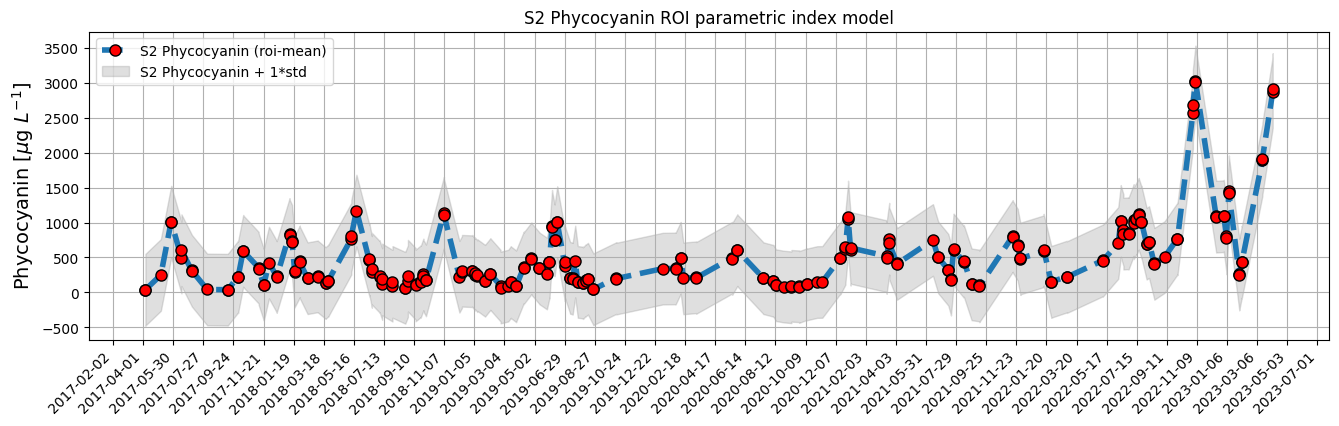

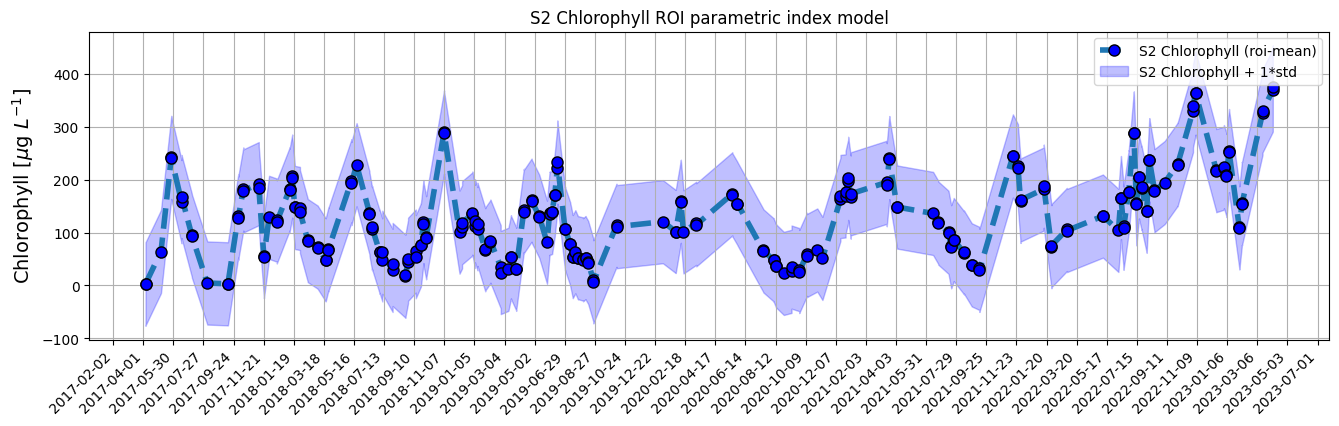

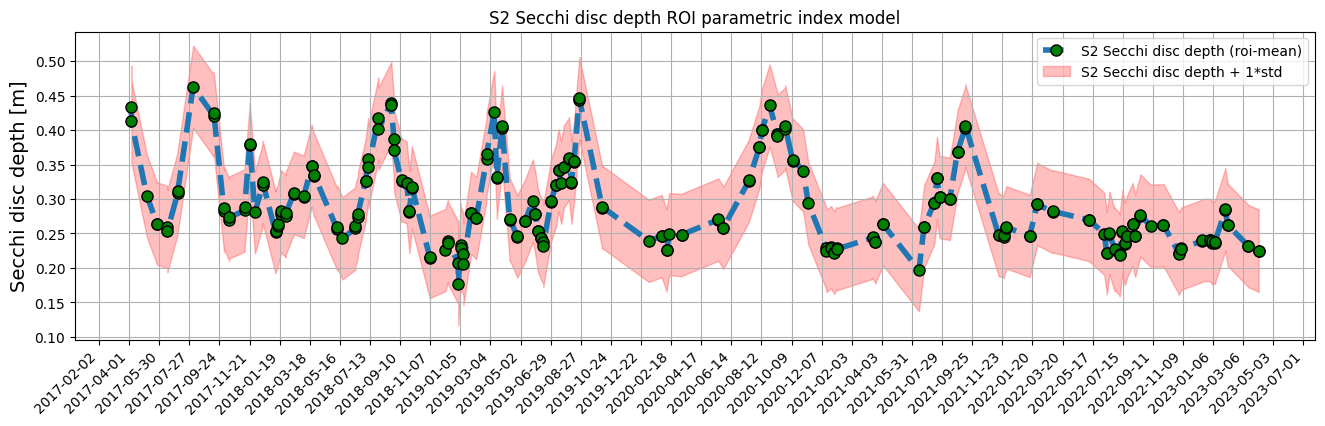

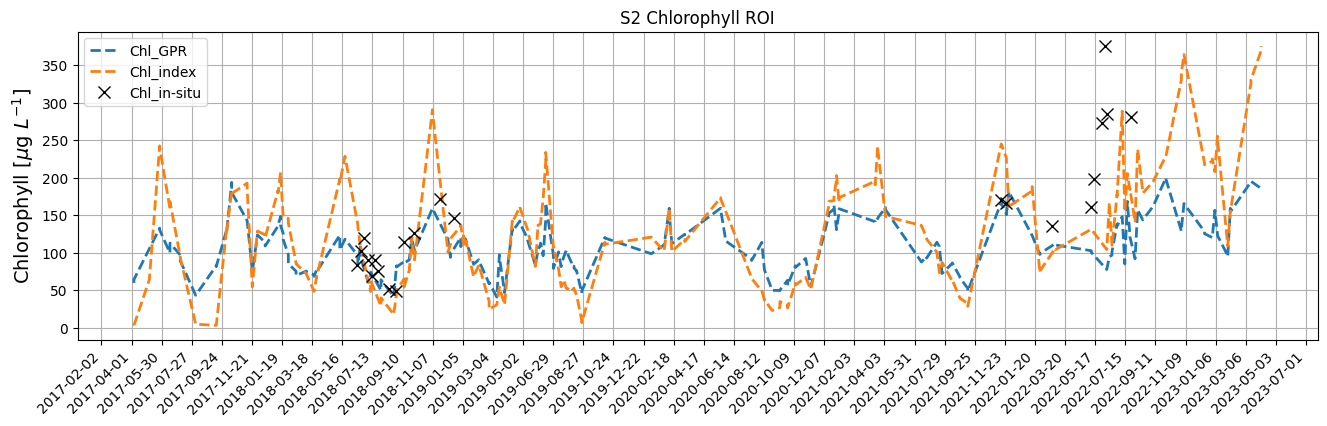

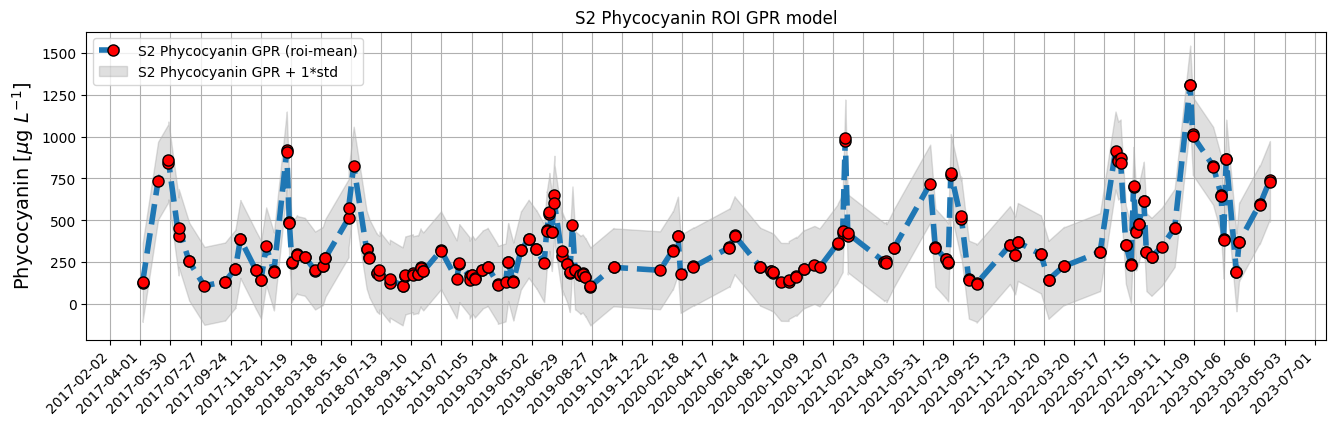

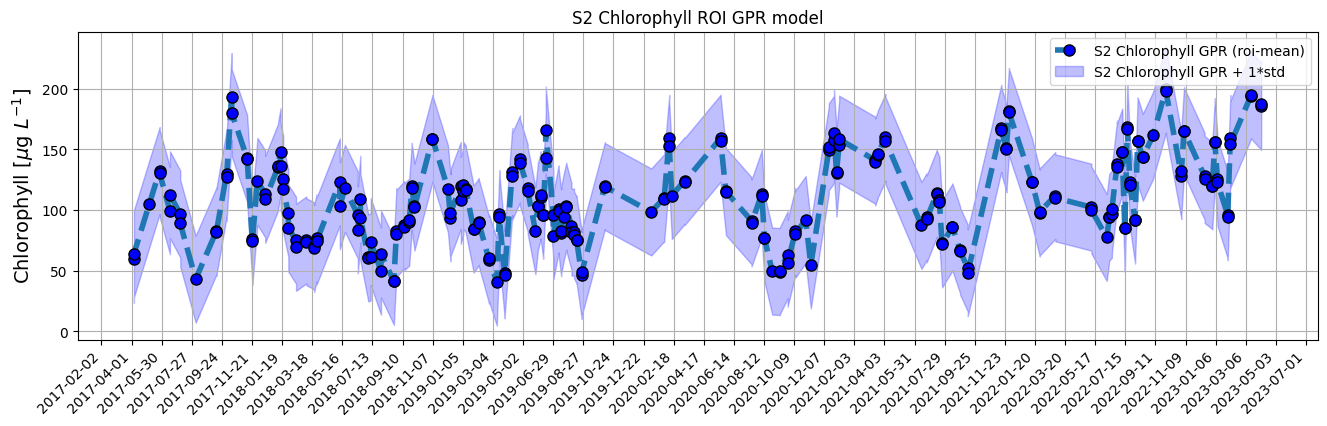

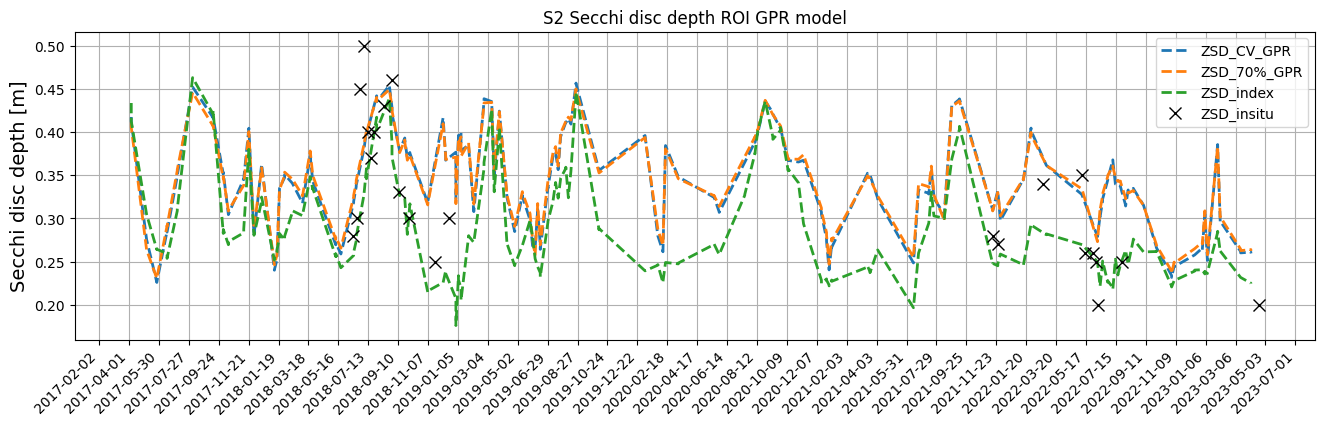

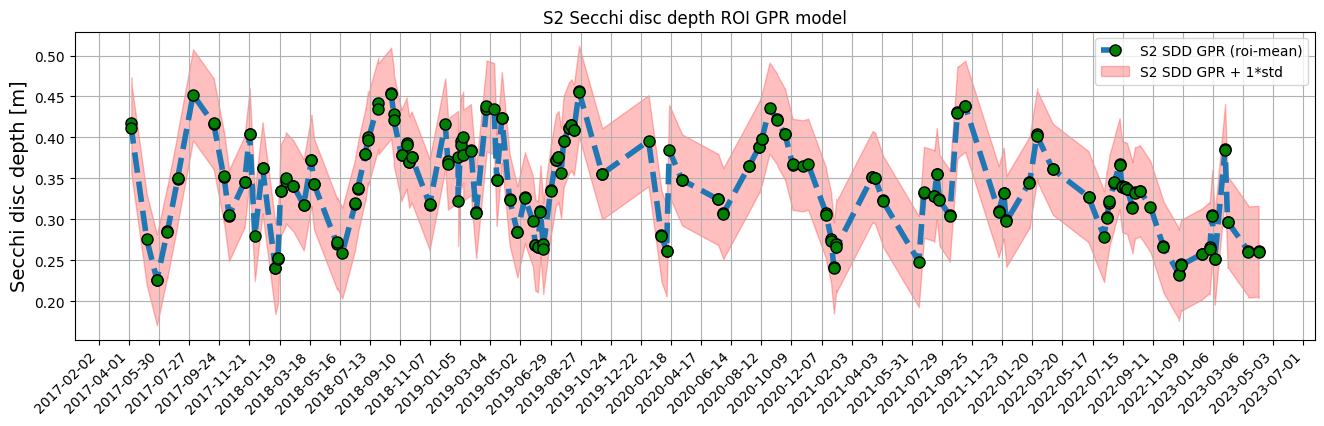

In [ ]:
axmaxloc = S2_CHLRO_image_nparray.shape[2]/4;
axminloc = S2_CHLRO_image_nparray.shape[2]/4;

# Sentinel 2 Phycocyanin parametric index model time series plotting 

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_FICO_parcel_mean,linestyle="--",marker="o",markerfacecolor='r',markeredgecolor='k',markersize=8,lw=4)
plt.fill_between(Dates_S2, S2_FICO_parcel_mean-S2_FICO_parcel_std,S2_FICO_parcel_mean+S2_FICO_parcel_std ,alpha=0.25,color='grey')
plt.title('S2 Phycocyanin ROI parametric index model')
plt.legend(['S2 Phycocyanin (roi-mean)','S2 Phycocyanin + 1*std'])
plt.grid(1)
plt.ylabel('Phycocyanin [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()


"""
plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(Dates_S2,S2_FICO_parcel_mean,'--k', lw=2)
plt.errorbar(Dates_S2,S2_FICO_parcel_mean, fmt='ro', label="data",yerr=S2_FICO_parcel_std, ecolor='black', lw=1,capsize=4)
plt.title('S2 Phycocyanin ROI')
plt.legend(['S2 Phycocyanin (roi-mean)','S2 Phycocyanin + 1*std'])
plt.grid(1)
plt.ylabel('Phycocyanin [$\mu$g $L^{-1}$]',fontsize='14')
plt.xticks(rotation=45, ha='right')
plt.show()
"""

# Sentinel 2 Chlrophyll parametric index model time series plotting 

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_CHLRO_parcel_mean,linestyle="--",marker="o",markerfacecolor='b',markeredgecolor='k',markersize=8,lw=4)
plt.fill_between(Dates_S2, S2_CHLRO_parcel_mean-S2_CHLRO_parcel_std,S2_CHLRO_parcel_mean+S2_CHLRO_parcel_std ,alpha=0.25,color='blue')
plt.title('S2 Chlorophyll ROI parametric index model')
plt.legend(['S2 Chlorophyll (roi-mean)','S2 Chlorophyll + 1*std'])
plt.grid(1)
plt.ylabel('Chlorophyll [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Sentinel 2 Secchi disc depth parametric index model time series plotting 

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(Dates_S2,S2_CECCHI_parcel_mean,linestyle="--",marker="o",markerfacecolor='g',markeredgecolor='k',markersize=8,lw=4)
plt.fill_between(Dates_S2, S2_CECCHI_parcel_mean-S2_CECCHI_parcel_std,S2_CECCHI_parcel_mean+S2_CECCHI_parcel_std ,alpha=0.25,color='red')
plt.title('S2 Secchi disc depth ROI parametric index model')
plt.legend(['S2 Secchi disc depth (roi-mean)','S2 Secchi disc depth + 1*std'])
plt.grid(1)
plt.ylabel('Secchi disc depth [m]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()


plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_GPR_CHL_parcel_mean,linestyle="--",lw=2,label='Chl_GPR')
plt.plot(Dates_S2,S2_CHLRO_parcel_mean,linestyle="--",lw=2,label='Chl_index')
plt.plot(X_insitu,Chl_insitu,'kx',markerfacecolor='k',markeredgecolor='k',markersize=8,label='Chl_in-situ')
plt.title('S2 Chlorophyll ROI')
plt.legend()
plt.grid(1)
plt.ylabel('Chlorophyll [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()


# Sentinel 2 Phycocyanin GPR model time series plotting 

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_GPR_PC_parcel_mean,linestyle="--",marker="o",markerfacecolor='r',markeredgecolor='k',markersize=8,lw=4)
plt.fill_between(Dates_S2, S2_GPR_PC_parcel_mean-S2_GPR_PC_parcel_std,S2_GPR_PC_parcel_mean+S2_GPR_PC_parcel_std ,alpha=0.25,color='grey')
plt.title('S2 Phycocyanin ROI GPR model')
plt.legend(['S2 Phycocyanin GPR (roi-mean)','S2 Phycocyanin GPR + 1*std'])
plt.grid(1)
plt.ylabel('Phycocyanin [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

"""
plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(Dates_S2,S2_CHLRO_parcel_mean,'--k', lw=2)
plt.errorbar(Dates_S2,S2_CHLRO_parcel_mean, fmt='ro', label="data",yerr=S2_CHLRO_parcel_std, ecolor='black', lw=1,capsize=4)
plt.title('S2 Chlorophyll ROI')
plt.legend(['S2 Chlorophyll (roi-mean)','S2 Chlorophyll GPR + 1*std'])
plt.grid(1)
plt.ylabel('Chlorophyll [$\mu$g $L^{-1}$]',fontsize='14')
plt.xticks(rotation=45, ha='right')
plt.show()
"""

# Sentinel 2 Chlorophyll GPR model time series plotting 

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_GPR_CHL_parcel_mean,linestyle="--",marker="o",markerfacecolor='b',markeredgecolor='k',markersize=8,lw=4)
plt.fill_between(Dates_S2, S2_GPR_CHL_parcel_mean-S2_GPR_CHL_parcel_std,S2_GPR_CHL_parcel_mean+S2_GPR_CHL_parcel_std ,alpha=0.25,color='blue')
plt.title('S2 Chlorophyll ROI GPR model')
plt.legend(['S2 Chlorophyll GPR (roi-mean)','S2 Chlorophyll GPR + 1*std'])
plt.grid(1)
plt.ylabel('Chlorophyll [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

"""
plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.plot(Dates_S2,S2_CECCHI_parcel_mean,'--k', lw=2)
plt.errorbar(Dates_S2,S2_CECCHI_parcel_mean, fmt='ro', label="data",yerr=S2_CECCHI_parcel_std, ecolor='black', lw=1,capsize=4)
plt.title('S2 Secchi disc depth ROI')
plt.legend(['S2 Secchi disc depth (roi-mean)','S2 Secchi disc depth + 1*std'])
plt.grid(1)
plt.ylabel('Secchi disc depth [m]',fontsize='14')
plt.xticks(rotation=45, ha='right')
plt.show()
"""
#Sentinel 2 Secchi Disk Depth GPR model time series plotting 

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_GPR_ZSD_parcel_mean,linestyle="--",lw=2,label='ZSD_CV_GPR')
plt.plot(Dates_S2,S2_GPR_ZSD2_parcel_mean,linestyle="--",lw=2,label='ZSD_70%_GPR')
plt.plot(Dates_S2,S2_CECCHI_parcel_mean,linestyle="--",lw=2,label='ZSD_index')
plt.plot(X_insitu,Secchi_insitu,'kx',markerfacecolor='k',markeredgecolor='k',markersize=8,label='ZSD_insitu')
plt.title('S2 Secchi disc depth ROI GPR model')
plt.legend()
plt.grid(1)
plt.ylabel('Secchi disc depth [m]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()


# Sentinel 2 Secchi Disk Depth GPR model time series plotting 

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_GPR_ZSD_parcel_mean,linestyle="--",marker="o",markerfacecolor='green',markeredgecolor='k',markersize=8,lw=4)
plt.fill_between(Dates_S2, S2_GPR_ZSD_parcel_mean-S2_GPR_ZSD_parcel_std,S2_GPR_ZSD_parcel_mean+S2_GPR_ZSD_parcel_std ,alpha=0.25,color='red')
plt.title('S2 Secchi disc depth ROI GPR model')
plt.legend(['S2 SDD GPR (roi-mean)','S2 SDD GPR + 1*std'])
plt.grid(1)
plt.ylabel('Secchi disc depth [m]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()


In [ ]:
S2_GPR_ZSD_parcel_mean[18]

0.37731639514976706

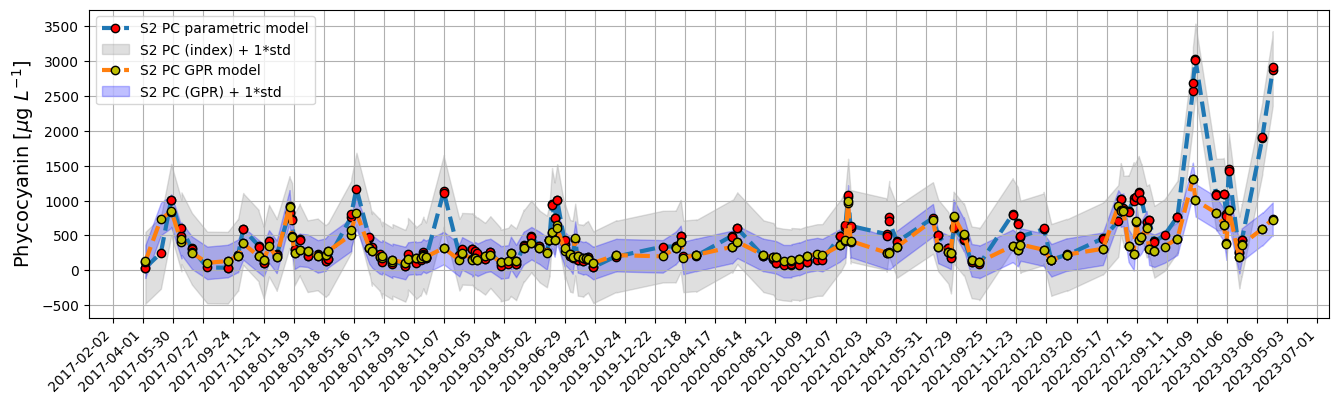

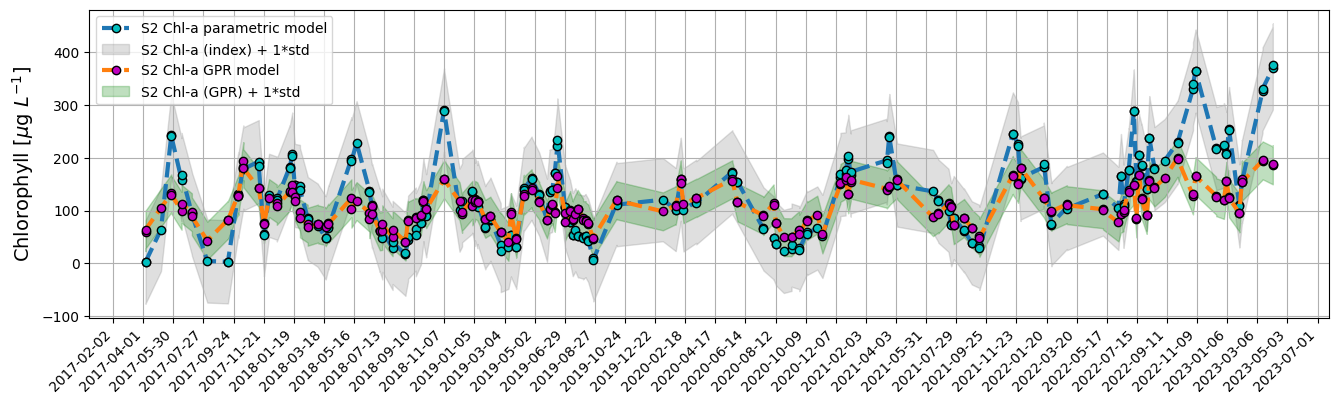

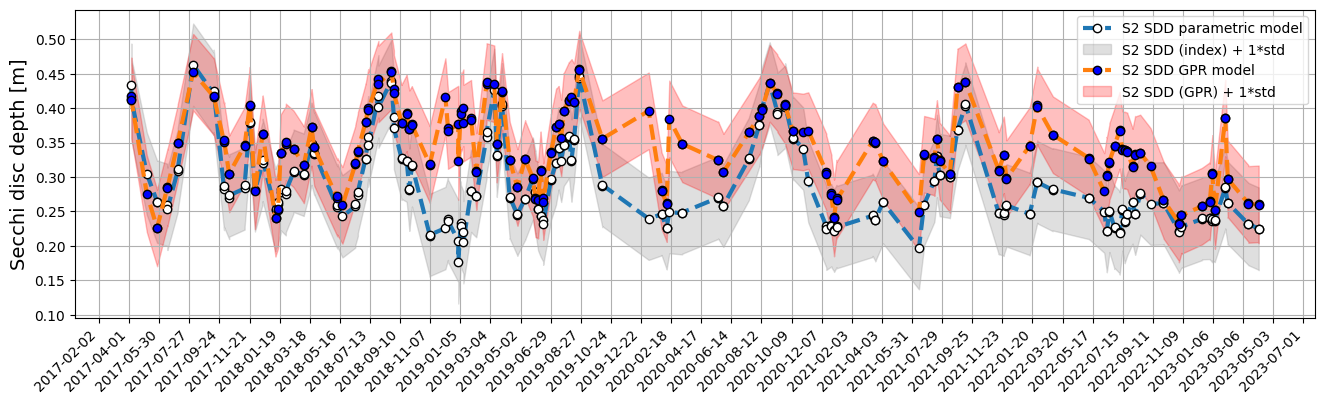

In [ ]:
#Comparative Graphs

# Sentinel 2 Phycocyanin parametrix index model vs GPR model time series plotting 

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_FICO_parcel_mean,linestyle="--",marker="o",markerfacecolor='r',markeredgecolor='k',markersize=6,lw=3,label='S2 PC parametric model')
plt.fill_between(Dates_S2, S2_FICO_parcel_mean-S2_FICO_parcel_std,S2_FICO_parcel_mean+S2_FICO_parcel_std ,alpha=0.25,color='grey',label='S2 PC (index) + 1*std')
plt.plot(Dates_S2,S2_GPR_PC_parcel_mean,linestyle="--",marker="o",markerfacecolor='y',markeredgecolor='k',markersize=6,lw=3,label='S2 PC GPR model')
plt.fill_between(Dates_S2, S2_GPR_PC_parcel_mean-S2_GPR_PC_parcel_std,S2_GPR_PC_parcel_mean+S2_GPR_PC_parcel_std ,alpha=0.25,color='blue',label='S2 PC (GPR) + 1*std')
#plt.title('S2 Phycocyanin ROI comparison')
plt.legend()
plt.grid(1)
plt.ylabel('Phycocyanin [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Sentinel 2 Chlorophyll parametric index model vs GPR model time series plotting 

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_CHLRO_parcel_mean,linestyle="--",marker="o",markerfacecolor='c',markeredgecolor='k',markersize=6,lw=3,label='S2 Chl-a parametric model')
plt.fill_between(Dates_S2, S2_CHLRO_parcel_mean-S2_CHLRO_parcel_std,S2_CHLRO_parcel_mean+S2_CHLRO_parcel_std ,alpha=0.25,color='grey',label='S2 Chl-a (index) + 1*std')
plt.plot(Dates_S2,S2_GPR_CHL_parcel_mean,linestyle="--",marker="o",markerfacecolor='m',markeredgecolor='k',markersize=6,lw=3,label='S2 Chl-a GPR model')
plt.fill_between(Dates_S2, S2_GPR_CHL_parcel_mean-S2_GPR_CHL_parcel_std,S2_GPR_CHL_parcel_mean+S2_GPR_CHL_parcel_std ,alpha=0.25,color='green',label='S2 Chl-a (GPR) + 1*std')

#plt.title('S2 Chlorophyll ROI comparison')
plt.legend()
plt.grid(1)
plt.ylabel('Chlorophyll [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

# Sentinel 2 Secchi Disk Depth parametric index model vs GPR model time series plotting 

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

plt.plot(Dates_S2,S2_CECCHI_parcel_mean,linestyle="--",marker="o",markerfacecolor='white',markeredgecolor='k',markersize=6,lw=3,label='S2 SDD parametric model')
plt.fill_between(Dates_S2, S2_CECCHI_parcel_mean-S2_CECCHI_parcel_std,S2_CECCHI_parcel_mean+S2_CECCHI_parcel_std ,alpha=0.25,color='grey',label='S2 SDD (index) + 1*std')
plt.plot(Dates_S2,S2_GPR_ZSD_parcel_mean,linestyle="--",marker="o",markerfacecolor='blue',markeredgecolor='k',markersize=6,lw=3,label='S2 SDD GPR model')
plt.fill_between(Dates_S2, S2_GPR_ZSD_parcel_mean-S2_GPR_ZSD_parcel_std,S2_GPR_ZSD_parcel_mean+S2_GPR_ZSD_parcel_std ,alpha=0.25,color='red',label='S2 SDD (GPR) + 1*std')
#plt.title('S2 Secchi disc depth ROI comparison')
plt.legend()
plt.grid(1)
plt.ylabel('Secchi disc depth [m]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

**Water parameter mapping**

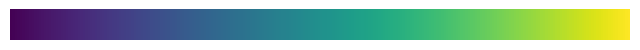

In [ ]:
palette_PC = cm.get_palette('viridis', n_class=10)
vis_PC = {'min': 0, 'max': 500, 'palette': palette_PC}
cm.plot_colormap('viridis', width=8.0, height=0.4, orientation='horizontal')

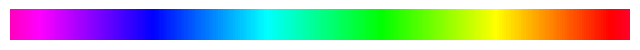

In [ ]:
palette_CHL = cm.get_palette('gist_rainbow_r', n_class=10)
vis_CHL = {'min': 0, 'max': 300, 'palette': palette_CHL}
cm.plot_colormap('gist_rainbow_r', width=8.0, height=0.4, orientation='horizontal')

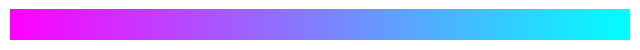

In [ ]:
palette_SDD = cm.get_palette('cool_r', n_class=10)
vis_SDD = {'min': 0.25, 'max': 0.45, 'palette': palette_SDD}
cm.plot_colormap('cool_r', width=8.0, height=0.4, orientation='horizontal')

In [ ]:
# Define the visualization parameters.
vizParams = {
  'bands': ['B4', 'B3', 'B2'],
  'min': 0,
  'max': 0.2,
  #'gamma': [0.95, 1.1, 1]
}

In [ ]:
u_lat = 39.34
u_lon = -0.35

Map_S2 = geemap.Map()
Map_S2 = geemap.Map(center=(u_lat,u_lon), zoom=13)
Map_S2.set_plot_options(add_marker_cluster=True)
Map_S2

Map(center=[39.34, -0.35], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

In [ ]:
S2collection_list = S2collection_ini.toList(S2collection_ini.size());
S2image = ee.Image(S2collection_list.get(231)) #.clip(roi_Albufera);
#S2image

In [ ]:
#Map_S2.addLayer(S2image, vizParams,'false color composite')

#Map_S2.addLayer(S2_GPR_CHL_image.select(212),vis_CHL, 'S2 CHL')
#Map_S2.addLayer(S2_GPR_PC_image.select(231),vis_PC, 'S2 PC')
Map_S2.addLayer(S2_FICO_image.select(2),vis_PC, 'S2 PC')
#Map_S2.addLayer(S2_CHLRO_image.select(226),vis_CHL, 'S2 CHL')
#Map_S2.addLayer(CHLRO_collection.mean(),vis_CHL, 'S2 CHL')
#Map_S2.addLayer(S2_GPR_CHL_collection.mean(),vis_CHL, 'S2 CHL')
#Map_S2.addLayer(S2_GPR_PC_collection.mean(),vis_PC, 'S2 PC')
#Map_S2.addLayer(S2_GPR_ZSD_collection.mean(),vis_SDD, 'S2 SDD')
#Map_S2.add_time_slider(S2_GPR_ZSD_collection ,vis_SDD, region=roi_Albufera,layer_name='S2 Time-series',labels=labels_S2, time_interval=1)
#Map_S2.add_time_slider(S2_GPR_PC_collection ,vis_PC, region=roi_Albufera,layer_name='S2 Time-series',labels=labels_S2, time_interval=1)
#Map_S2.add_time_slider(S2_GPR_CHL_collection ,vis_CHL, region=roi_Albufera,layer_name='S2 Time-series',labels=labels_S2, time_interval=1)
#Map_S2.addLayer(roi, {},'ROI')
Map_S2.addLayer(roi_Albufera, {},'Albufera ROI',opacity = 0.3)
#Map_S2.add_colorbar(vis_SDD, label="SDD (m)", orientation="vertical", layer_name="SDD GPR")
Map_S2.add_colorbar(vis_PC, label="PC (ug/L)", orientation="horizontal", layer_name="SDD GPR")
#Map_S2.add_colorbar(vis_CHL, label="CHL (ug/L)", orientation="horizontal", layer_name="SDD GPR")

In [ ]:
cm.list_colormaps()

In [ ]:
!pip install pygal
!pip install ipygee

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.5/74.5 kB 9.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for ipygee: filename=ipygee-0.0.18-py3-none-any.whl size=41221 sha256=5e3f37d1bf896ec7680570b3f8841a622ba3ff1ad66fa08e312ea5dee9427230
  Stored in directory: /root/.cache/pip/wheels/6c/50/ac/d40610837fb4e308655017ff83aa14f9cb45adcbbc5eb501f0
  Created wheel for geetools: filename=geetools-0.6.14-py3-none-any.whl size=92107 sha256=ccc1d5685b5fb5fd0b2b73844a6ab16cae39af9c71871c0409ec00fc9bf5bb05
  Stored in directory: /root/.cache/pip/wheels/e9/a8/7f/40bf5aafcc334b20cd12d0328aff7861e8ea655c20190967fb
Successfully built ipygee geetools


In [ ]:
import ipygee as ui
import pygal
from ipygee import *
from ipygee import chart

In [ ]:
# Chart *series*
test_site = roi_Albufera
chart_ts_GPR_Chl = ui.chart.Image.series(**{
    'imageCollection': S2_GPR_CHL_collection, 
    'region': test_site,
    'scale': 20,
    'reducer': ee.Reducer.mean(),
    'xProperty': 'system:time_start', 
    'system':'index',
    'bands': ['Chl'],
    'labels': ['Date','Chl-a']
})

chart_ts_GPR_Chl.renderWidget()  # for Jupyter Notebook or Lab

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [ ]:
chart_ts_index_Chl = ui.chart.Image.series(**{
    'imageCollection': CHLRO_collection, 
    'region': test_site,
    'scale': 20,
    'reducer': ee.Reducer.mean(),
    'xProperty': 'system:time_start',
    'bands': ['chlro'],
    'labels': ['Date','Chl-a']
})

chart_ts_index_Chl.renderWidget()  # for Jupyter Notebook or Lab

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [ ]:
# Chart *series*
chart_ts_GPR_PC = ui.chart.Image.series(**{
    'imageCollection': S2_GPR_PC_collection, 
    'region': test_site,
    'scale': 20,
    'reducer': ee.Reducer.mean(),
    'xProperty': 'system:time_start', 
    'system':'index',
    'bands': ['PC'],
    'labels': ['Date','PC']
})

chart_ts_GPR_PC.renderWidget()  # for Jupyter Notebook or Lab

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [ ]:
chart_ts_index_PC = ui.chart.Image.series(**{
    'imageCollection': FICO_collection, 
    'region': roi_show_map, #test_site
    'scale': 20,
    'reducer': ee.Reducer.mean(),
    'bands': ['fico'],
    'labels': ['Date','PC']
})

chart_ts_index_PC.renderWidget()  # for Jupyter Notebook or Lab

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

In [ ]:
# Chart *series*
chart_ts_SDD = ui.chart.Image.series(**{
    'imageCollection': S2_GPR_ZSD_collection, 
    'region': test_site,
    'scale': 300,
    'reducer': ee.Reducer.mean(),
    'xProperty': 'system:time_start',
    'bands': ['ZSD'],
    'labels': ['Date','SDD']
})

chart_ts_SDD.renderWidget()  # for Jupyter Notebook or Lab

HTML(value='<embed src=data:image/svg+xml;charset=utf-8;base64,PD94bWwgdmVyc2lvbj0nMS4wJyBlbmNvZGluZz0ndXRmLTg…

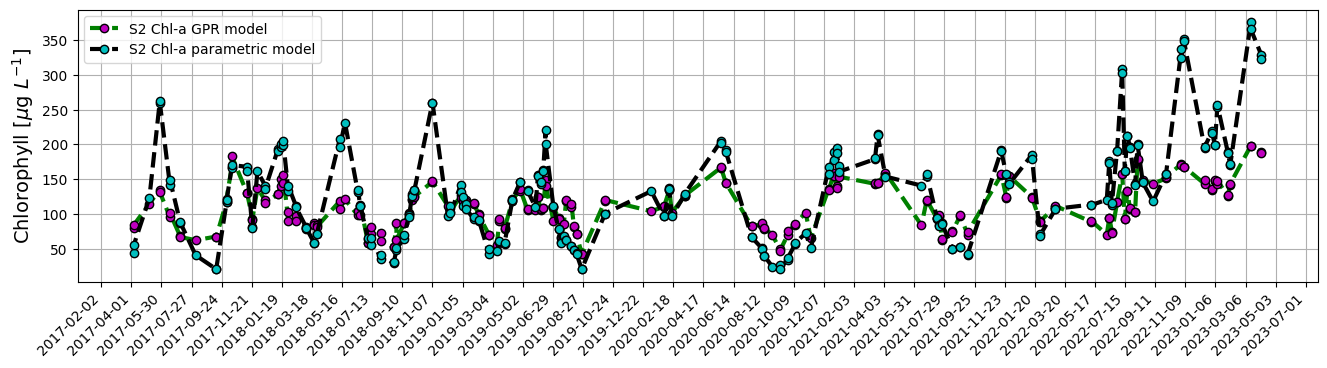

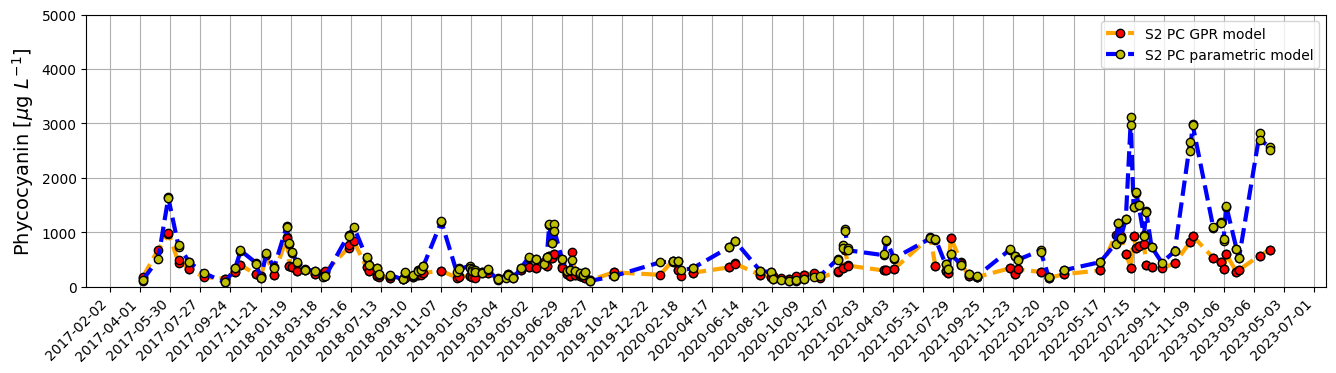

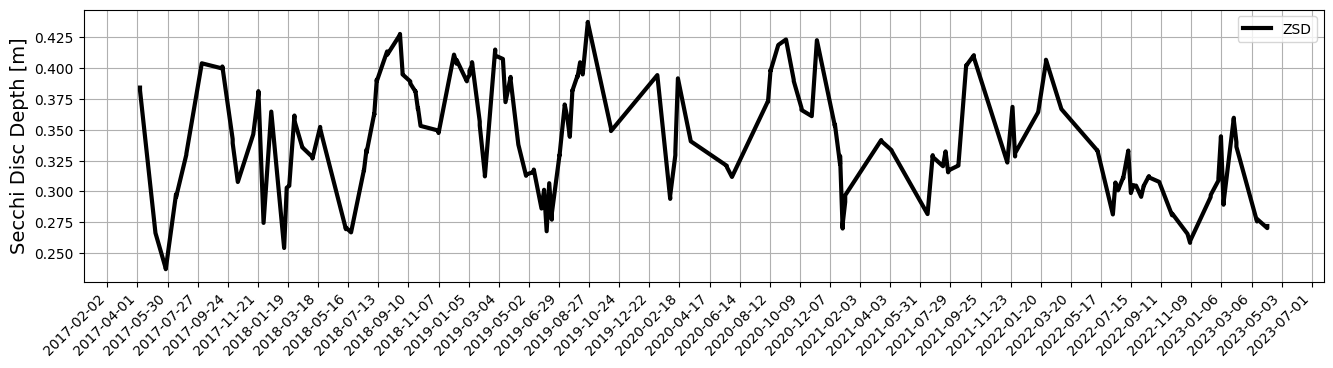

In [ ]:
# Sentinel 2 time series plotting 
df_GPR_chl = chart_ts_GPR_Chl.dataframe
df_index_chl = chart_ts_index_Chl.dataframe

df_GPR_PC = chart_ts_GPR_PC.dataframe
df_index_PC = chart_ts_index_PC.dataframe

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
df_GPR_chl.plot(y='Chl', kind='line',figsize=(16,4),color='green', ax=ax,linestyle="--",marker="o",markerfacecolor='m',markeredgecolor='k',markersize=6,lw=3,label='S2 Chl-a GPR model');
df_index_chl.plot(y='chlro', kind='line',figsize=(16,4),lw=3,color='black', ax=ax,linestyle="--",marker="o",markerfacecolor='c',markeredgecolor='k',markersize=6,label='S2 Chl-a parametric model');
plt.legend()
#plt.ylim(0,300)
plt.ylabel('Chlorophyll [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
df_GPR_PC.plot(y='PC', kind='line',figsize=(16,4),color='orange', ax=ax,linestyle="--",marker="o",markerfacecolor='r',markeredgecolor='k',markersize=6,lw=3,label='S2 PC GPR model');
df_index_PC.plot(y='fico', kind='line',figsize=(16,4),lw=3,color='blue', ax=ax,linestyle="--",marker="o",markerfacecolor='y',markeredgecolor='k',markersize=6,label='S2 PC parametric model');
plt.legend()
plt.ylim(0,5000)
plt.ylabel('Phycocyanin [$\mu$g $L^{-1}$]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

df_SDD = chart_ts_SDD.dataframe
plt.figure(figsize= (16,4))
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(axmaxloc))
ax.xaxis.set_minor_locator(ticker.MultipleLocator(axminloc))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
df_SDD.plot(y='ZSD', kind='line',figsize=(16,4),lw=3,color='black', ax=ax);
plt.legend()
plt.ylabel('Secchi Disc Depth [m]',fontsize='14')
plt.grid(1)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
# Function to mask out NDWI
def S2maskedWater2(image):
    NDWI = image.select(['NDWI']);
    return image.addBands(ee.Image(1).updateMask(NDWI.lte(-0.3)).rename('NDWI_mask')); #gte

S2collection_aux2 = S2collection_raw.map(addNDWI).map(S2maskedWater2).map(maskBands);  

# Add NDWI_mask band to image collection
NDWI_collection = S2collection_aux2.select('NDWI')

S2_NDWI_mask_image = NDWI_collection.toBands().unmask(0);

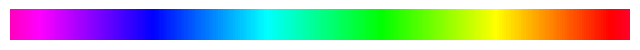

In [ ]:
palette_NDWI = cm.get_palette('gist_rainbow_r', n_class=10)
vis_NDWI = {'min': -1, 'max': 0, 'palette': palette_NDWI}
cm.plot_colormap('gist_rainbow_r', width=8.0, height=0.4, orientation='horizontal')

In [ ]:
u_lat = 39.34
u_lon = -0.35

Map_S2_2 = geemap.Map()
Map_S2_2 = geemap.Map(center=(u_lat,u_lon), zoom=13)
Map_S2_2.set_plot_options(add_marker_cluster=True)
Map_S2_2

Map(center=[39.34, -0.35], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(childre…

In [ ]:
#Map_S2_2.add_time_slider(NDWI_collection ,vis_NDWI, region=roi_Albufera,layer_name='S2 Time-series',labels=labels_S2, time_interval=1)
Map_S2_2.addLayer(S2_NDWI_mask_image.select(2),vis_NDWI,'S2 CHL')
#Map_S2_2.addLayer(S2_masked_collection_image.select(212),vis_NDWI,'S2 NDWI')
Map_S2_2.addLayer(roi_Albufera, {},'Albufera ROI',opacity = 0.3)
Map_S2_2.add_colorbar(vis_NDWI, label="NDWI", orientation="horizontal", layer_name="NDWI")

#Map_S2_2.addLayer(S2_CHLRO_image.select(157),vis_CHL, 'S2 CHL')
#Map_S2.add_colorbar(vis_CHL, label="CHL (ug/L)", orientation="vertical", layer_name="SDD CHL")

In [ ]:

chart_NDWI_histogram = ui.Chart.image.histogram(**{
    
        image: modisSr, region: histRegion, scale: 500})
        .setSeriesNames(['Red', 'NIR', 'SWIR'])
        .setOptions({
          title: 'MODIS SR Reflectance Histogram',
          hAxis: {
            title: 'Reflectance (scaled by 1e4)',
            titleTextStyle: {italic: false, bold: true},
          },
          vAxis:
              {title: 'Count', titleTextStyle: {italic: false, bold: true}},
          colors: ['cf513e', '1d6b99', 'f0af07']
        });
print(chart);

# Chart *series*
chart_ts_SDD = ui.chart.Image.series(**{
    'imageCollection': S2_GPR_ZSD_collection, 
    'region': test_site,
    'scale': 300,
    'reducer': ee.Reducer.mean(),
    'xProperty': 'system:time_start',
    'bands': ['ZSD'],
    'labels': ['Date','SDD']
})

chart_ts_SDD.renderWidget()  # for Jupyter Notebook or Lab

S1 collection filtering